<h1 align='center' style='color:blue'>ES335 Prerequisite test</h1>

#### 1.

#### 2.

In [1]:
import time
import numpy as np

# Function to multiply matrices using list of lists
def matmul_list(B, C):
    n = len(B)
    k = len(B[0])
    m = len(C[0])
    
    # Initialize result matrix A with zeros
    A = [[0] * m for _ in range(n)]
    
    # Matrix multiplication
    for i in range(n):
        for j in range(m):
            sum_val = 0
            for r in range(k):
                sum_val += B[i][r] * C[r][j]
            A[i][j] = sum_val
    return A

# Generate random matrices of size (n x k) and (k x m)
n, k, m = 200, 300, 150

# Using list of lists with random integers
np.random.seed(0)
B_list = np.random.randint(0, 10, size=(n, k)).tolist()
C_list = np.random.randint(0, 10, size=(k, m)).tolist()

# Using numpy arrays with same values
B_np = np.array(B_list)
C_np = np.array(C_list)

# Time matrix multiplication using list of lists
start = time.time()
A_list = matmul_list(B_list, C_list)
time_list = time.time() - start

# Time matrix multiplication using numpy
start = time.time()
A_np = np.dot(B_np, C_np)
time_np = time.time() - start

# Verify correctness (allowing small floating point errors)
# Convert A_list to numpy for comparison
A_list_np = np.array(A_list)
assert np.allclose(A_list_np, A_np), "Results do not match!"

# Print timings
print(f"Time using list of lists: {time_list:.4f} seconds")
print(f"Time using NumPy:          {time_np:.4f} seconds")

# Which one is faster and why?
if time_np < time_list:
    print("\nNumPy is faster because it uses optimized C and Fortran libraries and takes advantage of vectorized operations and hardware acceleration.")
else:
    print("\nList of lists method is faster (this is unexpected for large matrices).")



Time using list of lists: 0.4934 seconds
Time using NumPy:          0.0057 seconds

NumPy is faster because it uses optimized C and Fortran libraries and takes advantage of vectorized operations and hardware acceleration.


#### 3.

In [2]:
import random

def naive_median(arr):
    # Copy array to avoid modifying original
    data = arr[:]
    n = len(data)
    
    if n % 2 == 1:
        median_pos = n // 2
        for _ in range(median_pos):
            max_val = max(data)
            data.remove(max_val)
        return max(data)
    else:
        median_pos = n // 2 - 1
        for _ in range(median_pos):
            max_val = max(data)
            data.remove(max_val)
        max1 = max(data)
        data.remove(max1)
        max2 = max(data)
        return (max1 + max2) / 2

def quickselect(arr, k):
    if len(arr) == 1:
        return arr[0]
    
    pivot = random.choice(arr)
    
    lows = [el for el in arr if el < pivot]
    highs = [el for el in arr if el > pivot]
    pivots = [el for el in arr if el == pivot]
    
    if k < len(lows):
        return quickselect(lows, k)
    elif k < len(lows) + len(pivots):
        return pivot
    else:
        return quickselect(highs, k - len(lows) - len(pivots))

def quickselect_median(arr):
    n = len(arr)
    if n % 2 == 1:
        return quickselect(arr, n // 2)
    else:
        lower = quickselect(arr, n // 2 - 1)
        upper = quickselect(arr, n // 2)
        return (lower + upper) / 2

# Generate a random list
np.random.seed(0)
arr = np.random.randint(0, 100000, size=10000).tolist()

# Timing naive method (Warning: slow for large arrays)
start = time.time()
median_naive = naive_median(arr)
time_naive = time.time() - start

# Timing quickselect method
start = time.time()
median_qs = quickselect_median(arr)
time_qs = time.time() - start

# Timing numpy median
start = time.time()
median_np = np.median(arr)
time_np = time.time() - start

# Results
print(f"Naive method median: {median_naive} (Time: {time_naive:.4f} seconds)")
print(f"Quickselect median: {median_qs} (Time: {time_qs:.4f} seconds)")
print(f"Numpy median:       {median_np} (Time: {time_np:.4f} seconds)")

# Verify correctness
assert abs(median_naive - median_np) < 1e-9, "Naive median differs!"
assert abs(median_qs - median_np) < 1e-9, "Quickselect median differs!"


Naive method median: 50318.5 (Time: 0.5771 seconds)
Quickselect median: 50318.5 (Time: 0.0043 seconds)
Numpy median:       50318.5 (Time: 0.0007 seconds)


#### 4.

#### 5.

In [3]:
import jax.numpy as jnp
from jax import grad

# Function definition
def f_jax(x, y):
    return x**2 * y + y**3 * jnp.sin(x)

# Analytical gradients
def analytical_grad(x, y):
    dfdx = 2 * x * y + y**3 * jnp.cos(x)
    dfdy = x**2 + 3 * y**2 * jnp.sin(x)
    return dfdx, dfdy

# JAX gradients
grad_x = grad(f_jax, argnums=0)
grad_y = grad(f_jax, argnums=1)

# Test at a few random values
np.random.seed(25250004)
for _ in range(2):
    x_val = np.random.uniform(-10, 10)
    y_val = np.random.uniform(-10, 10)
    
    # Compute gradients
    g_x = grad_x(x_val, y_val)
    g_y = grad_y(x_val, y_val)
    
    a_x, a_y = analytical_grad(x_val, y_val)
    
    print(f"x = {x_val:.4f}, y = {y_val:.4f}")
    print(f"JAX grad_x: {g_x:.6f}, Analytical grad_x: {a_x:.6f}")
    print(f"JAX grad_y: {g_y:.6f}, Analytical grad_y: {a_y:.6f}")
    print(f"Difference in grad_x: {abs(g_x - a_x):.6e}")
    print(f"Difference in grad_y: {abs(g_y - a_y):.6e}")
    print("-" * 40)


x = -4.9564, y = -9.8998
JAX grad_x: -136.239899, Analytical grad_x: -136.239899
JAX grad_y: 309.876740, Analytical grad_y: 309.876740
Difference in grad_x: 0.000000e+00
Difference in grad_y: 0.000000e+00
----------------------------------------
x = -6.1284, y = 2.7899
JAX grad_x: -12.739273, Analytical grad_x: -12.739273
JAX grad_y: 41.157146, Analytical grad_y: 41.157146
Difference in grad_x: 0.000000e+00
Difference in grad_y: 0.000000e+00
----------------------------------------


#### 6.

In [4]:
import sympy as sp
from sympy import init_printing
from IPython.display import display  # <- Import display from IPython

x, y = sp.symbols('x y')
f = x**2 * y + y**3 * sp.sin(x)

grad_f = [sp.diff(f, var) for var in (x, y)]

init_printing()  # Enable LaTeX pretty printing in Jupyter

display(*grad_f)  # Use display from IPython to render nicely

#### 7.

In [5]:
students_data = {
    2022: {
        "Branch 1": {
            1: {
                "Name": "N",
                "Marks": {
                    "Maths": 100,
                    "English": 70,
                    # add more subjects as needed
                }
            },
            # add more roll numbers for Branch 1 in 2022
        },
        "Branch 2": {
            # roll numbers with student data for Branch 2 in 2022
        }
    },
    2023: {
        "Branch 1": {
            # students here
        },
        "Branch 2": {
            # students here
        }
    },
    2024: {
        "Branch 1": {},
        "Branch 2": {}
    },
    2025: {
        "Branch 1": {},
        "Branch 2": {}
    }
}


#### 8.

In [6]:
class Student:
    def __init__(self, roll_number, name, marks=None):
        self.roll_number = roll_number
        self.name = name
        self.marks = marks if marks is not None else {}

    def __repr__(self):
        return f"Student(roll_number={self.roll_number}, name='{self.name}', marks={self.marks})"


class Branch:
    def __init__(self, name):
        self.name = name
        self.students = []  # list of Student objects

    def add_student(self, student):
        self.students.append(student)

    def __repr__(self):
        return f"Branch(name='{self.name}', students={self.students})"


class Year:
    def __init__(self, year):
        self.year = year
        self.branches = []  # list of Branch objects

    def add_branch(self, branch):
        self.branches.append(branch)

    def __repr__(self):
        return f"Year(year={self.year}, branches={self.branches})"


class Database:
    def __init__(self):
        self.years = []  # list of Year objects

    def add_year(self, year):
        self.years.append(year)

    def __repr__(self):
        return f"Database(years={self.years})"


# Example Usage:

# Create some students
student1 = Student(1, "N", {"Maths": 100, "English": 70})
student2 = Student(2, "A", {"Maths": 90, "English": 80})

# Create a branch and add students
branch1_2022 = Branch("Branch 1")
branch1_2022.add_student(student1)
branch1_2022.add_student(student2)

branch2_2022 = Branch("Branch 2")  # empty for now

# Create a year and add branches
year_2022 = Year(2022)
year_2022.add_branch(branch1_2022)
year_2022.add_branch(branch2_2022)

# Create the overall database and add year
db = Database()
db.add_year(year_2022)

print(db)

Database(years=[Year(year=2022, branches=[Branch(name='Branch 1', students=[Student(roll_number=1, name='N', marks={'Maths': 100, 'English': 70}), Student(roll_number=2, name='A', marks={'Maths': 90, 'English': 80})]), Branch(name='Branch 2', students=[])])])


#### 9.

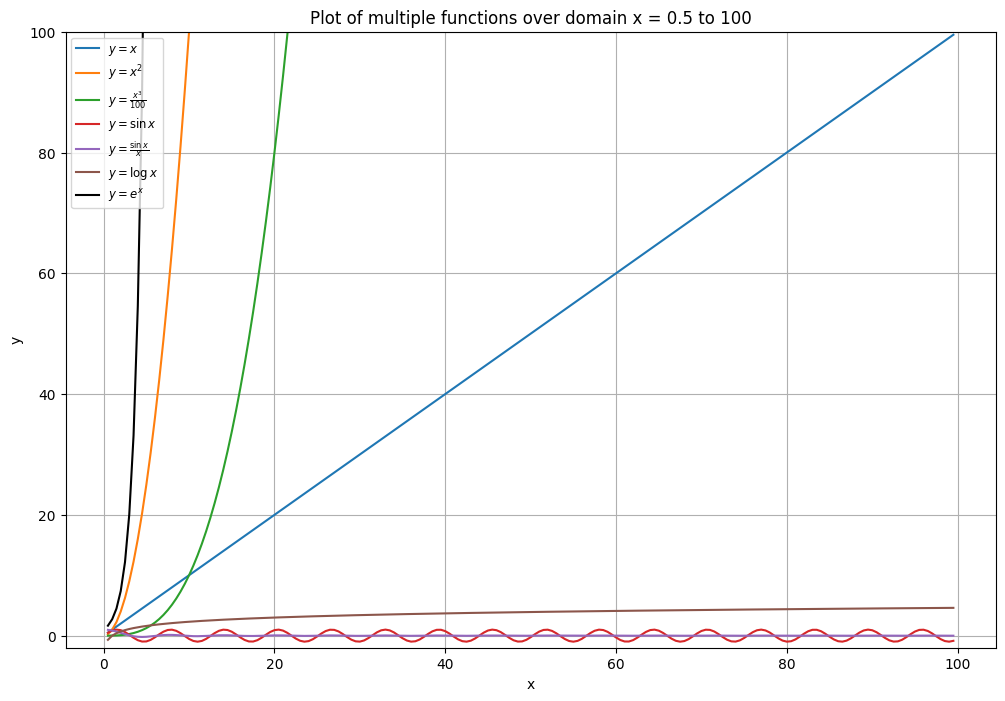

In [7]:
import matplotlib.pyplot as plt

# Define the domain
x = np.arange(0.5, 100.0, 0.5)  # from 0.5 to 100 in steps of 0.5

# Define functions
y1 = x
y2 = x**2
y3 = x**3 / 100
y4 = np.sin(x)
y5 = np.sin(x) / x
y6 = np.log(x)
y7 = np.exp(x)

# Plotting
plt.figure(figsize=(12, 8))

plt.plot(x, y1, label=r'$y = x$')
plt.plot(x, y2, label=r'$y = x^2$')
plt.plot(x, y3, label=r'$y = \frac{x^3}{100}$')
plt.plot(x, y4, label=r'$y = \sin x$')
plt.plot(x, y5, label=r'$y = \frac{\sin x}{x}$')
plt.plot(x, y6, label=r'$y = \log x$')

# For y7 = exp(x), since it grows very fast, plot on a secondary y-axis
plt.plot(x, y7, label=r'$y = e^x$', color='black')

plt.title('Plot of multiple functions over domain x = 0.5 to 100')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper left', fontsize='small')
plt.grid(True)
plt.ylim([-2, 100])  # Limit y-axis to avoid huge spikes from exp(x)

plt.show()

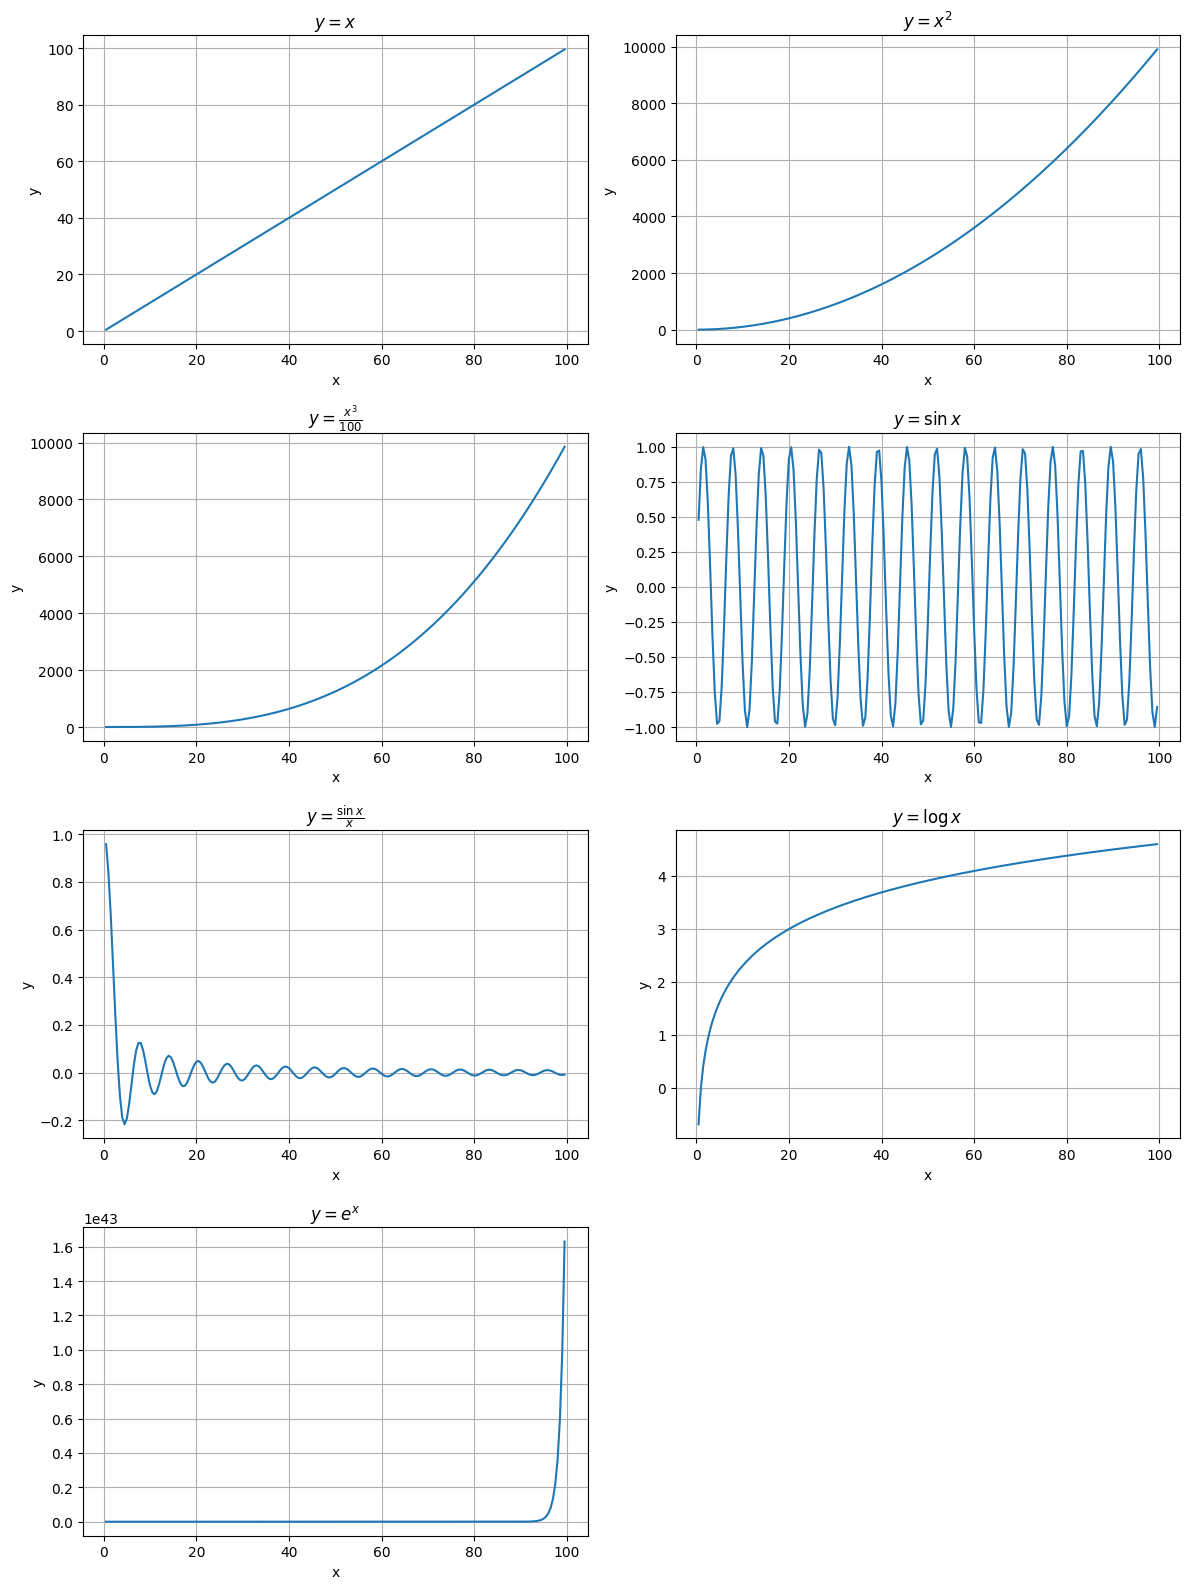

In [8]:
# Define the domain
x = np.arange(0.5, 100.0, 0.5)

# Define functions
y1 = x
y2 = x**2
y3 = x**3 / 100
y4 = np.sin(x)
y5 = np.sin(x) / x
y6 = np.log(x)
y7 = np.exp(x)

# Create figure and axes
fig, axes = plt.subplots(4, 2, figsize=(12, 16))
axes = axes.flatten()  # flatten to easily index

functions = [y1, y2, y3, y4, y5, y6, y7]
titles = [
    r'$y = x$',
    r'$y = x^2$',
    r'$y = \frac{x^3}{100}$',
    r'$y = \sin x$',
    r'$y = \frac{\sin x}{x}$',
    r'$y = \log x$',
    r'$y = e^x$'
]

for i, (func, title) in enumerate(zip(functions, titles)):
    axes[i].plot(x, func)
    axes[i].set_title(title)
    axes[i].grid(True)
    axes[i].set_xlabel('x')
    axes[i].set_ylabel('y')

# Hide the last empty subplot (8th plot)
axes[7].axis('off')

# Set common labels
for ax in axes:
    ax.grid(True)
    ax.set_xlabel('x')
    ax.set_ylabel('y')

plt.tight_layout()
plt.show()

#### 10.

In [9]:
import pandas as pd

# Step 1: Generate a 20x5 matrix with random numbers uniformly distributed between 1 and 2
matrix = np.random.uniform(1, 2, size=(20, 5))

# Step 2: Create a DataFrame with column names 'a', 'b', 'c', 'd', 'e'
df = pd.DataFrame(matrix, columns=['a', 'b', 'c', 'd', 'e'])

# Step 3: Find the column with the highest standard deviation
std_devs = df.std()
col_highest_std = std_devs.idxmax()
highest_std_value = std_devs.max()

# Step 4: Find the row with the lowest mean
row_means = df.mean(axis=1)
row_lowest_mean_index = row_means.idxmin()
lowest_mean_value = row_means.min()

print("DataFrame:")
print(df)
print("\nColumn standard deviations:")
print(std_devs)
print(f"\nColumn with highest std deviation: '{col_highest_std}' with std = {highest_std_value:.4f}")

print("\nRow means:")
print(row_means)
print(f"\nRow with lowest mean: index {row_lowest_mean_index} with mean = {lowest_mean_value:.4f}")

print("\nRow with lowest mean data:")
print(df.loc[row_lowest_mean_index])

DataFrame:
           a         b         c         d         e
0   1.811187  1.039055  1.420538  1.429741  1.781816
1   1.408278  1.226721  1.151232  1.521506  1.333431
2   1.623655  1.659574  1.873982  1.003618  1.962043
3   1.495559  1.977456  1.780665  1.887342  1.535046
4   1.126096  1.365618  1.566335  1.288621  1.251498
5   1.476474  1.321054  1.811704  1.101397  1.568399
6   1.275684  1.638074  1.948827  1.066444  1.875548
7   1.365962  1.955635  1.772066  1.678505  1.710255
8   1.905794  1.827935  1.956240  1.188228  1.838772
9   1.524033  1.427511  1.527190  1.301950  1.599669
10  1.757907  1.602184  1.861438  1.567574  1.533051
11  1.492169  1.956304  1.910442  1.408088  1.711603
12  1.900068  1.254037  1.580138  1.210204  1.662277
13  1.867323  1.744666  1.671868  1.369722  1.248194
14  1.840281  1.040077  1.342786  1.276798  1.023230
15  1.331900  1.302994  1.447261  1.988855  1.125140
16  1.591275  1.370564  1.861448  1.548139  1.219395
17  1.150508  1.097328  1.199229  1

#### 11.

In [10]:
# Add column 'f' = sum of columns a, b, c, d, e
df['f'] = df[['a', 'b', 'c', 'd', 'e']].sum(axis=1)

# Add column 'g' with condition on 'f'
df['g'] = np.where(df['f'] < 8, 'LT8', 'GT8')

# Find number of rows where 'g' == 'LT8'
num_lt8 = (df['g'] == 'LT8').sum()

# Find std deviation of 'f' for rows where 'g' == 'LT8' and 'GT8'
std_f_lt8 = df.loc[df['g'] == 'LT8', 'f'].std()
std_f_gt8 = df.loc[df['g'] == 'GT8', 'f'].std()

print(df)
print(f"\nNumber of rows where 'g' is 'LT8': {num_lt8}")
print(f"Standard deviation of 'f' where 'g' is 'LT8': {std_f_lt8:.4f}")
print(f"Standard deviation of 'f' where 'g' is 'GT8': {std_f_gt8:.4f}")


           a         b         c         d         e         f    g
0   1.811187  1.039055  1.420538  1.429741  1.781816  7.482338  LT8
1   1.408278  1.226721  1.151232  1.521506  1.333431  6.641168  LT8
2   1.623655  1.659574  1.873982  1.003618  1.962043  8.122872  GT8
3   1.495559  1.977456  1.780665  1.887342  1.535046  8.676068  GT8
4   1.126096  1.365618  1.566335  1.288621  1.251498  6.598167  LT8
5   1.476474  1.321054  1.811704  1.101397  1.568399  7.279029  LT8
6   1.275684  1.638074  1.948827  1.066444  1.875548  7.804577  LT8
7   1.365962  1.955635  1.772066  1.678505  1.710255  8.482423  GT8
8   1.905794  1.827935  1.956240  1.188228  1.838772  8.716970  GT8
9   1.524033  1.427511  1.527190  1.301950  1.599669  7.380353  LT8
10  1.757907  1.602184  1.861438  1.567574  1.533051  8.322154  GT8
11  1.492169  1.956304  1.910442  1.408088  1.711603  8.478606  GT8
12  1.900068  1.254037  1.580138  1.210204  1.662277  7.606723  LT8
13  1.867323  1.744666  1.671868  1.369722  1.24

#### 12.

In [11]:
# Create a 3x3 matrix
A = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

# Create a 1D array (vector) with 3 elements
b = np.array([10, 20, 30])

# Add the vector b to each row of A using broadcasting
C = A + b

print("Matrix A:")
print(A)
print("\nVector b:")
print(b)
print("\nResult of A + b (broadcasting):")
print(C)


Matrix A:
[[1 2 3]
 [4 5 6]
 [7 8 9]]

Vector b:
[10 20 30]

Result of A + b (broadcasting):
[[11 22 33]
 [14 25 36]
 [17 28 39]]


#### 13.

In [12]:
def manual_argmin(arr):
    min_index = 0
    min_value = arr[0]
    for i in range(1, len(arr)):
        if arr[i] < min_value:
            min_value = arr[i]
            min_index = i
    return min_index

# Example usage
arr = np.array([5, 2, 9, 1, 7])

manual_index = manual_argmin(arr)
numpy_index = np.argmin(arr)

print(f"Manual argmin index: {manual_index}")
print(f"Numpy argmin index: {numpy_index}")

assert manual_index == numpy_index, "Mismatch between manual and numpy argmin"


Manual argmin index: 3
Numpy argmin index: 3
